In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Reading the All Calls by Month Data

In [3]:
# List of (month label, file path) tuples
month_files = [
    ('April 2024', 'All Calls by Month/April 2024.xlsx'),
    ('August 2024', 'All Calls by Month/August 2024.xlsx'),
    ('December 2024', 'All Calls by Month/December 2024.xlsx'),
    ('February 2025', 'All Calls by Month/February 2025.xlsx'),
    ('January 2025', 'All Calls by Month/January 2025.xlsx'),
    ('July 2024', 'All Calls by Month/July 2024.xlsx'),
    ('June 2024', 'All Calls by Month/June 2024.xlsx'),
    ('March 2025', 'All Calls by Month/March 2025.xlsx'),
    ('May 2024', 'All Calls by Month/May 2024.xlsx'),
    ('October 2024', 'All Calls by Month/October 2024.xlsx'),
    ('September 2024', 'All Calls by Month/September 2024.xlsx'),
]

# Read and combine all DataFrames
dfs = []

for month, path in month_files:
    df = pd.read_excel(path)
    df['Month'] = month

    # moving month column to first column
    cols = df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('Month')))
    df = df[cols]
    
    dfs.append(df)

# Concatenate all into a single DataFrame
all_calls = pd.concat(dfs, ignore_index = True)

In [4]:
all_calls.shape

(660413, 65)

In [5]:
print(all_calls.columns.tolist())

['Month', 'Start time', 'Answer time', 'Duration', 'Called number', 'Correlation ID', 'Location', 'Inbound trunk', 'Outbound trunk', 'Route group', 'Direction', 'Call type', 'Client type', 'Client version', 'Sub client type', 'OS type', 'Device Mac', 'Model', 'Answered', 'International Country', 'Original reason', 'Related reason', 'Redirect reason', 'Site main number', 'Site timezone', 'User type', 'Call ID', 'Local SessionID', 'Remote SessionID', 'User UUID', 'Org UUID', 'Report ID', 'Department ID', 'Site UUID', 'Releasing party', 'Redirecting number', 'Transfer related call ID', 'Authorization code', 'Call transfer time', 'User number', 'Local call ID', 'Remote call ID', 'Network call ID', 'Related call ID', 'Call outcome', 'Call outcome reason', 'Final local sessionID', 'Final remote sessionID', 'Answer Indicator', 'Ring duration', 'Release time', 'Report time', 'PSTN legal entity', 'PSTN vendor Org ID', 'PSTN vendor name', 'PSTN provider ID', 'External caller ID number', 'Device 

In [6]:
# Convert datetime columns
datetime_columns = ['Start time', 'Answer time', 'Release time', 'Report time']

for col in datetime_columns:
    if col in all_calls.columns:
        all_calls[col] = pd.to_datetime(all_calls[col], errors='coerce')

# Quick check
all_calls.head()

,Month,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,...,PSTN provider ID,External caller ID number,Device owner UUID,Call Recording Platform Name,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,User
0,April 2024,2024-04-30 23:58:53.988000+00:00,2024-04-30 23:58:54.214000+00:00,32,13123411070,91dada8b-2545-4a48-bf74-9e975e36859f,HQ,NaN,wcc_Pc_tp-ipRwm_ku064NHZiw,NaN,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April 2024,2024-04-30 23:56:37.386000+00:00,2024-04-30 23:56:37.435000+00:00,29,13123478300,36826ea7-3d2f-4374-96e1-d208215b94ac,HQ,NaN,NaN,NaN,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April 2024,2024-04-30 23:54:59.099000+00:00,2024-04-30 23:54:59.155000+00:00,19,13123478300,955117f1-8425-4c98-834b-24bc2e7885ed,HQ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April 2024,2024-04-30 23:54:59.099000+00:00,2024-04-30 23:54:59.155000+00:00,19,13123478300,955117f1-8425-4c98-834b-24bc2e7885ed,HQ,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April 2024,2024-04-30 23:54:52.336000+00:00,2024-04-30 23:55:21.466000+00:00,38,17739608783,2ced078f-6d9c-478c-8150-4c9e7021713a,HQ,NaN,NaN,NaN,...,afc59c71-23c9-4884-bab9-535f916eb11b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Adding New Columns
all_calls['Hour'] = all_calls['Start time'].dt.hour
    # what hour did they call based on start time
all_calls['DayOfWeek'] = all_calls['Start time'].dt.day_name()
    # what day of the week did they call based on start time

In [8]:
all_calls.columns

Index(['Month', 'Start time', 'Answer time', 'Duration', 'Called number',
       'Correlation ID', 'Location', 'Inbound trunk', 'Outbound trunk',
       'Route group', 'Direction', 'Call type', 'Client type',
       'Client version', 'Sub client type', 'OS type', 'Device Mac', 'Model',
       'Answered', 'International Country', 'Original reason',
       'Related reason', 'Redirect reason', 'Site main number',
       'Site timezone', 'User type', 'Call ID', 'Local SessionID',
       'Remote SessionID', 'User UUID', 'Org UUID', 'Report ID',
       'Department ID', 'Site UUID', 'Releasing party', 'Redirecting number',
       'Transfer related call ID', 'Authorization code', 'Call transfer time',
       'User number', 'Local call ID', 'Remote call ID', 'Network call ID',
       'Related call ID', 'Call outcome', 'Call outcome reason',
       'Final local sessionID', 'Final remote sessionID', 'Answer Indicator',
       'Ring duration', 'Release time', 'Report time', 'PSTN legal entity',
  

In [9]:
all_calls.shape

(660413, 67)

In [10]:
all_calls['Date'] = all_calls['Start time'].dt.date

## Exploratory Data Analysis

### Call Volume Over Time

In [27]:
# Call volume by hour
calls_by_hour = all_calls.groupby('Hour').size()
print(calls_by_hour.sort_values(ascending=False))

# Call volume by day of week
calls_by_day = all_calls.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print(calls_by_day.sort_values(ascending=False))

# Call volume over time (daily)
calls_by_date = all_calls.groupby('Date').size()
print(calls_by_date.sort_values(ascending=False))

Hour
15    81923
16    81851
17    73725
19    73058
18    72296
20    69903
14    69171
21    54832
13    35412
22    22202
23     6923
12     5942
0      3508
1      2332
11     1592
2      1314
3       922
10      836
4       690
9       607
5       482
6       432
7       264
8       196
dtype: int64
DayOfWeek
Tuesday      135259
Wednesday    133973
Monday       130880
Thursday     130170
Friday       117435
Saturday       7938
Sunday         4758
dtype: int64
Date
2025-01-30    6004
2025-01-29    5936
2025-01-31    4568
2024-07-08    3728
2025-02-18    3638
              ... 
2024-04-02      58
2025-01-26      58
2025-03-30      56
2024-10-27      55
2024-04-03      49
Length: 335, dtype: int64


### Visualizing Trends

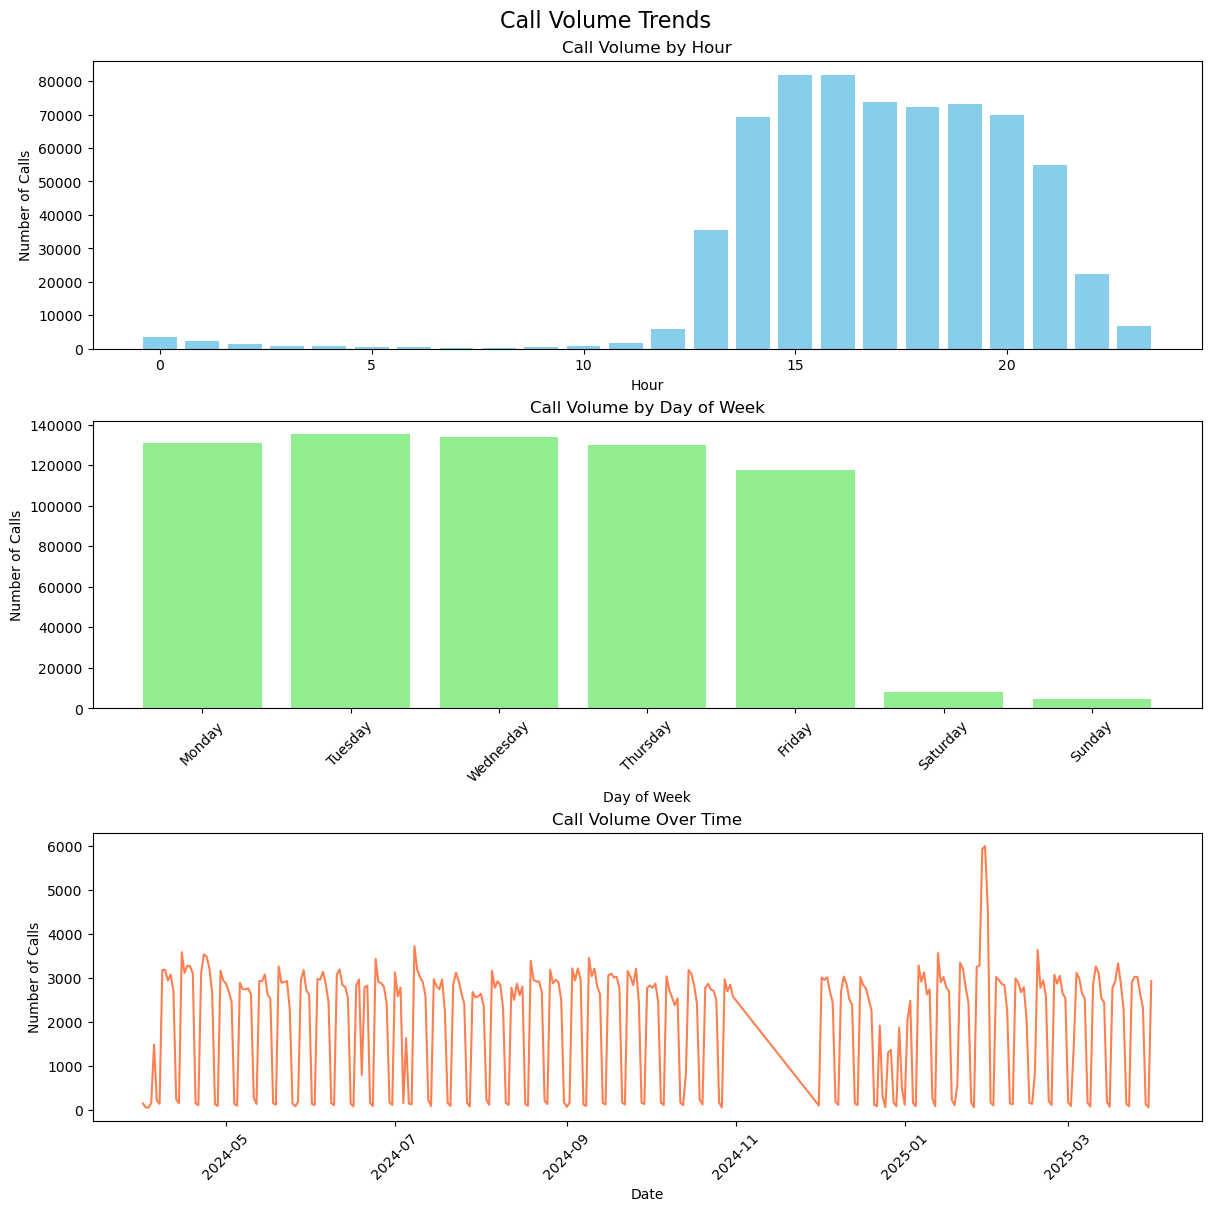

In [32]:
# Prepare the data
calls_by_hour = all_calls.groupby('Hour').size().sort_index()
calls_by_day = all_calls.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
calls_by_date = all_calls.groupby('Date').size().sort_index()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), constrained_layout=True)

# Plot 1: Call Volume by Hour
axes[0].bar(calls_by_hour.index, calls_by_hour.values, color='skyblue')
axes[0].set_title('Call Volume by Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Calls')

# Plot 2: Call Volume by Day of Week
axes[1].bar(calls_by_day.index, calls_by_day.values, color='lightgreen')
axes[1].set_title('Call Volume by Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Number of Calls')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Call Volume Over Time
axes[2].plot(calls_by_date.index, calls_by_date.values, color='coral')
axes[2].set_title('Call Volume Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Number of Calls')
axes[2].tick_params(axis='x', rotation=45)

# Optional overall title
fig.suptitle('Call Volume Trends', fontsize=16)

fig.savefig('call_volume_trends.png', dpi=300, bbox_inches='tight')

plt.show()

In [34]:
# Step 1: Count total outcomes by day
outcomes_by_day = all_calls.groupby(['DayOfWeek', 'Call outcome']).size().unstack(fill_value=0)

# Step 2: Calculate rate per day (i.e., normalize by row)
outcome_rates = outcomes_by_day.div(outcomes_by_day.sum(axis=1), axis=0)

# Optional: Sort days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
outcome_rates = outcome_rates.reindex(ordered_days)

print(outcome_rates)

Call outcome   Failure   Refusal   Success
DayOfWeek                                 
Monday        0.001796  0.011400  0.986805
Tuesday       0.001168  0.013308  0.985524
Wednesday     0.000858  0.012876  0.986266
Thursday      0.000922  0.011086  0.987993
Friday        0.001269  0.011087  0.987644
Saturday      0.000252  0.004157  0.995591
Sunday        0.000000  0.003993  0.996007


### Repeat Callers

there are a lot of missing values in Call ID, External caller ID number, and more.
1. need to find a way to get more data or concatenate in a way that gives me less missingness

In [37]:
print(all_calls.isnull().sum()[all_calls.isnull().sum() > 0])

Answer time                      30419
Inbound trunk                   586230
Outbound trunk                  510373
Route group                     660413
Client version                  504415
Sub client type                 616782
Device Mac                      599868
Model                           599868
International Country           660318
Original reason                 366584
Related reason                  536017
Redirect reason                 366584
Call ID                         259413
Local SessionID                  30278
Remote SessionID                282718
User UUID                       224248
Department ID                   660413
Redirecting number              366584
Transfer related call ID        620579
Authorization code              660413
Call transfer time              570177
Remote call ID                  319092
Network call ID                 353003
Related call ID                 575851
Call outcome reason             588004
Final local sessionID    

In [13]:
# # Choose identifier: External caller ID or User number
# caller_col = 'External caller ID number'

# # Count number of calls per caller
# caller_counts = all_calls[caller_col].value_counts()

# # Flag repeat callers: more than 3 calls total
# repeat_callers = caller_counts[caller_counts > 3]

# # Merge repeat flag back into the main DataFrame
# all_calls['Repeat_Caller'] = all_calls[caller_col].isin(repeat_callers.index)

# # Optionally correlate with unanswered or transferred
# repeat_unanswered = all_calls[all_calls['Repeat_Caller'] & (all_calls['Answered'] == 'False')]

### Calls Outside Business Hours

In [14]:
# Define business hours
business_start = 8
business_end = 17

# Flag calls outside business hours
all_calls['Outside_Business_Hours'] = ~all_calls['Hour'].between(business_start, business_end - 1)

# Calculate percentage
outside_call_pct = all_calls['Outside_Business_Hours'].mean() * 100
print(outside_call_pct)

# # Unanswered calls outside business hours
outside_unanswered = all_calls[all_calls['Outside_Business_Hours'] & (all_calls['Answered'] == 'False')]
outside_unanswered

57.976296650732195


,Month,Start time,Answer time,Duration,Called number,Correlation ID,Location,Inbound trunk,Outbound trunk,Route group,...,Call Recording Result,Call Recording Trigger,Redirecting party UUID,Public Calling IP Address,Public Called IP Address,User,Hour,DayOfWeek,Date,Outside_Business_Hours


### Call Duration Analysis
*assuming that duration is in minutes*

In [15]:
# Convert duration to numeric (in case it's stored as string)
all_calls['Duration_min'] = pd.to_numeric(all_calls['Duration'], errors='coerce')

# Summary stats
duration_stats = all_calls['Duration_min'].describe()
print(duration_stats)

# Compare by Direction
duration_by_direction = all_calls.groupby('Direction')['Duration_min'].describe()
print(duration_by_direction)

# Compare by Answered
duration_by_answered = all_calls.groupby('Answered')['Duration_min'].describe()
print(duration_by_answered)

count    660413.000000
mean        199.876297
std         845.536150
min           0.000000
25%          19.000000
50%          62.000000
75%         183.000000
max      142257.000000
Name: Duration_min, dtype: float64
                count        mean         std  min   25%   50%    75%  \
Direction                                                               
ORIGINATING  276186.0  226.441927  923.894850  0.0  19.0  56.0  169.0   
TERMINATING  384227.0  180.780671  783.835605  0.0  19.0  66.0  190.0   

                  max  
Direction              
ORIGINATING  142257.0  
TERMINATING  142257.0  
             count        mean        std  min   25%   50%    75%       max
Answered                                                                   
False      30419.0    0.000000    0.00000  0.0   0.0   0.0    0.0       0.0
True      629994.0  209.527242  864.54003  0.0  23.0  68.0  195.0  142257.0


In [16]:
all_calls['Duration_min']

0           32
1           29
2           19
3           19
4           38
          ... 
660408      76
660409      76
660410      76
660411    1212
660412    1758
Name: Duration_min, Length: 660413, dtype: int64

In [18]:
duration_data = all_calls['Duration_min']

# Find the smallest and largest values in 'Duration_min'
min_duration = duration_data.min()
max_duration = duration_data.max()

print(f"Smallest Duration: {min_duration} minutes")
print(f"Largest Duration: {max_duration} minutes")

Smallest Duration: 0 minutes
Largest Duration: 142257 minutes


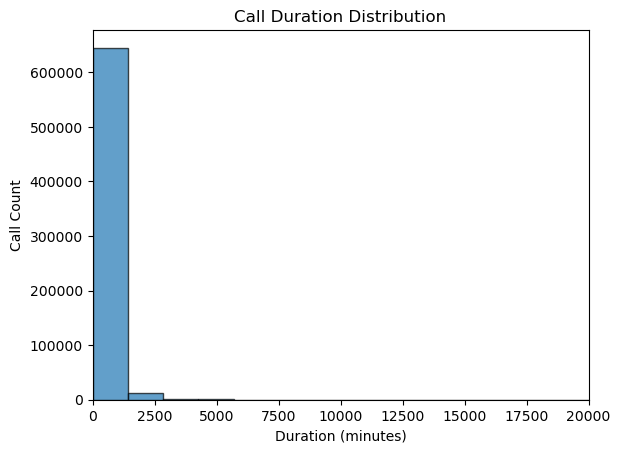

In [19]:
# Histogram of durations
duration_data = all_calls['Duration_min']
plt.hist(duration_data, bins=100, edgecolor='black', alpha=0.7)
plt.title("Call Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Call Count")
plt.xlim(0, 20000)
plt.show()

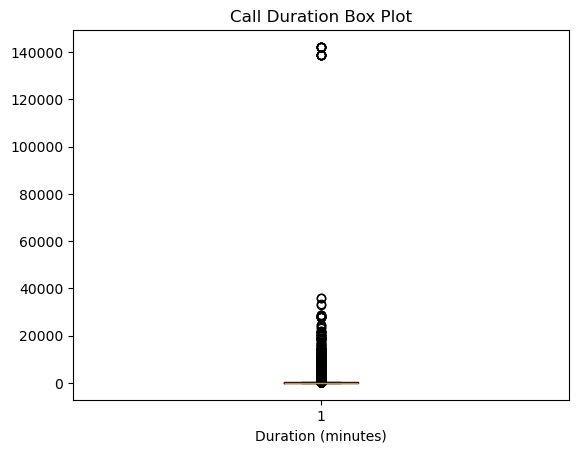

In [20]:
# Creating the box plot
plt.boxplot(duration_data)
plt.title("Call Duration Box Plot")
plt.xlabel("Duration (minutes)")
plt.show()

In [21]:
# Calculate the first (Q1) and third quartile (Q3)
Q1 = duration_data.quantile(0.25)
Q3 = duration_data.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

print(f"Interquartile Range (IQR): {IQR} minutes")
print(f"Q1: {Q1} minutes")
print(f"Q3: {Q3} minutes")

Interquartile Range (IQR): 164.0 minutes
Q1: 19.0 minutes
Q3: 183.0 minutes


### Unanswered or Dropped Calls

In [22]:
# Normalize to lowercase strings
answered_clean = all_calls['Answered'].astype(str).str.lower()

# Map to boolean: adjust as needed based on what you find
all_calls['Answered'] = answered_clean.isin(['true', 'yes', '1'])

# Cast to boolean (not object)
all_calls['Answered'] = all_calls['Answered'].astype(bool)

print(all_calls['Answered'].dtype)  # should output: bool

bool


In [23]:
# Unanswered calls
unanswered_calls = all_calls[all_calls['Answered'] == False]
print(unanswered_calls)

# Call outcome breakdown
outcome_counts = all_calls['Call outcome'].value_counts(dropna=False)
print(outcome_counts)

# Unanswered rate by hour
unanswered_by_hour = unanswered_calls.groupby('Hour').size() / all_calls.groupby('Hour').size()
unanswered_by_hour = unanswered_by_hour.fillna(0) * 100  # convert to percentage

                 Month                       Start time Answer time  Duration  \
6           April 2024 2024-04-30 23:52:48.157000+00:00         NaT         0   
7           April 2024 2024-04-30 23:47:13.840000+00:00         NaT         0   
17          April 2024 2024-04-30 23:19:44.684000+00:00         NaT         0   
18          April 2024 2024-04-30 23:19:21.874000+00:00         NaT         0   
23          April 2024 2024-04-30 23:14:23.194000+00:00         NaT         0   
...                ...                              ...         ...       ...   
660224  September 2024 2024-09-02 19:15:47.550000+00:00         NaT         0   
660226  September 2024 2024-09-02 19:15:34.859000+00:00         NaT         0   
660231  September 2024 2024-09-02 18:59:38.056000+00:00         NaT         0   
660274  September 2024 2024-09-02 16:13:07.858000+00:00         NaT         0   
660368  September 2024 2024-09-01 20:52:47.958000+00:00         NaT         0   

             Called number 

In [24]:
print(unanswered_by_hour)
unanswered_by_hour.sort_values(ascending=False)

Hour
0     3.563284
1     4.759863
2     5.859970
3     5.531453
4     5.797101
5     5.809129
6     4.398148
7     7.196970
8     4.081633
9     2.635914
10    3.229665
11    2.638191
12    4.173679
13    3.908280
14    3.896141
15    4.759347
16    4.721995
17    4.436758
18    4.513389
19    4.868734
20    4.685064
21    5.113802
22    5.305828
23    6.023400
dtype: float64


Hour
7     7.196970
23    6.023400
2     5.859970
5     5.809129
4     5.797101
3     5.531453
22    5.305828
21    5.113802
19    4.868734
1     4.759863
15    4.759347
16    4.721995
20    4.685064
18    4.513389
17    4.436758
6     4.398148
12    4.173679
8     4.081633
13    3.908280
14    3.896141
0     3.563284
10    3.229665
11    2.638191
9     2.635914
dtype: float64

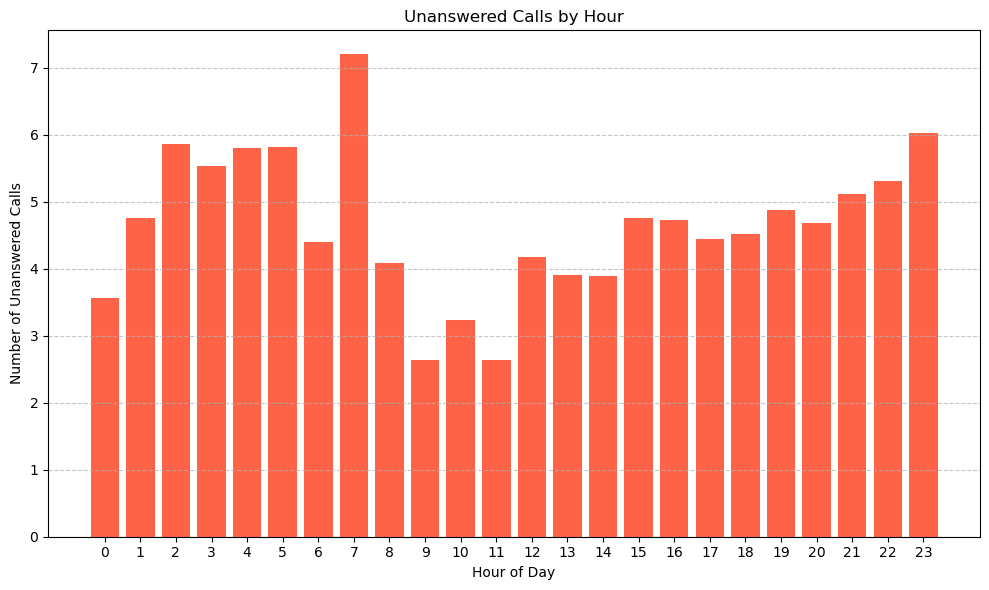

In [36]:
# Sort values by hour (index) to ensure bars are in time order
unanswered_by_hour_sorted = unanswered_by_hour.sort_index()

# Create the histogram (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(unanswered_by_hour_sorted.index, unanswered_by_hour_sorted.values, color='tomato')
plt.title('Unanswered Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Unanswered Calls')
plt.xticks(unanswered_by_hour_sorted.index)  # ensure all hour labels show
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('unanswered_calls_by_hour.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
print(all_calls['Answered'].value_counts())

Answered
True     629994
False     30419
Name: count, dtype: int64


In [26]:
# Total number of calls
total_calls = len(all_calls)

# Number of unanswered calls (Answered == False)
unanswered_calls_count = (all_calls['Answered'] == False).sum()

# Calculate the percentage
unanswered_percentage = (unanswered_calls_count / total_calls) * 100

print(f"Unanswered Call Percentage: {unanswered_percentage:.2f}%")

Unanswered Call Percentage: 4.61%


## Creating a Report that Removes all the Extraneous Info and Focuses on the Clean, Important Stuff! 

1. Filter relevant calls only:
    - Include: Incoming calls to the main number + intake lines.
    - Exclude: Outbound calls and inbound calls to specific staff.
<br>
2. Consolidate multiple steps into one "call":
    - Some callers might get transferred or logged multiple times; you want to treat that as a single interaction.
<br>
3. Create a clean, visual report:
    - Summary stats (e.g., total calls, unanswered %).
    - Breakdowns by time, intake line, etc.
    - Charts (boxplots, bar, trend lines).
<br>
4. Automate it monthly:
    - So you don’t have to do it manually each time.
    - This could be done with a phone line dashboard, maybe done in Excel so we can use pivot tables and see an easy way for automatic updates

**What We Need**
1. Clean Caller ID info
2. Filtering Logic
3. Python Script / Jupyter Notebook that does all the Filtering Logic, grouping, and in general relevant coding automatically